In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
ds = ['emodb', 'emovo', 'ravdess']

In [4]:
mtd_ls = {}
for d in ds:
    mtd_ls[d] = pd.read_csv(f"/datasets/nicolas_facchinetti/processed_data/{d}/metadata_final.csv")
    
    # 
    # pd.read_csv(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data//{d}/metadata_final.csv")
    

In [5]:
mtd_ls[ds[0]]

,path,filename,chunk,label,actor,gender,mod
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,0
1,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,1,sad,13,f,0
2,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,1
3,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,1,sad,13,f,1
4,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,1
...,...,...,...,...,...,...,...
4144,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2
4145,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,1,happy,8,f,2
4146,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2
4147,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2


In [6]:
mtd_ls[ds[1]]

,path,filename,chunk,label,actor,gender,mod
0,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,0,happy,m3,m,0
1,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,1,happy,m3,m,0
2,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,0,happy,m3,m,1
3,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,1,happy,m3,m,1
4,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,0,happy,m3,m,1
...,...,...,...,...,...,...,...
4926,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,0,fear,m2,m,1
4927,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,0,fear,m2,m,2
4928,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,0,fear,m2,m,2
4929,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,0,fear,m2,m,2


In [7]:
mtd_ls[ds[2]]

,path,filename,chunk,label,actor,gender,mod
0,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-15.wav,0,surprised,Actor_15,m,0
1,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-15.wav,0,surprised,Actor_15,m,1
2,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-15.wav,0,surprised,Actor_15,m,1
3,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-15.wav,0,surprised,Actor_15,m,1
4,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-15.wav,0,surprised,Actor_15,m,1
...,...,...,...,...,...,...,...
8947,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,1
8948,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2
8949,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2
8950,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2


In [8]:
mtd_ls[ds[0]].label.unique()

array(['sad', 'fear', 'neutral', 'happy', 'angry'], dtype=object)

In [9]:
mtd_ls[ds[1]].label.unique()

array(['happy', 'fear', 'surprised', 'disgust', 'neutral'], dtype=object)

In [10]:
mtd_ls[ds[2]].label.unique()

array(['surprised', 'disgust', 'sad', 'happy', 'fear'], dtype=object)

In [11]:
random_state = 1997

In [15]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant', 'prior']

def dummy_scores(d):
    y = d['label']
    X = d.drop('label', axis = 1)
    X = X.drop('actor', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    

    test_scores = []
    for s in strategies:
        if s =='constant':
            dclf = DummyClassifier(strategy = s, random_state = random_state, constant ='happy')
        else:
            dclf = DummyClassifier(strategy = s, random_state = random_state)
        dclf.fit(X_train, y_train)
        score = dclf.score(X_test, y_test)
        test_scores.append(score)
    return test_scores

In [16]:
scores = {d: dummy_scores(mtd_ls[d]) for d in ds}

In [17]:
def plot_scores(scores):
    strategies = ['most_frequent', 'stratified', 'uniform', 'constant', 'prior']
    plt.plot(strategies, scores, 'ro')
    plt.show()

emodb


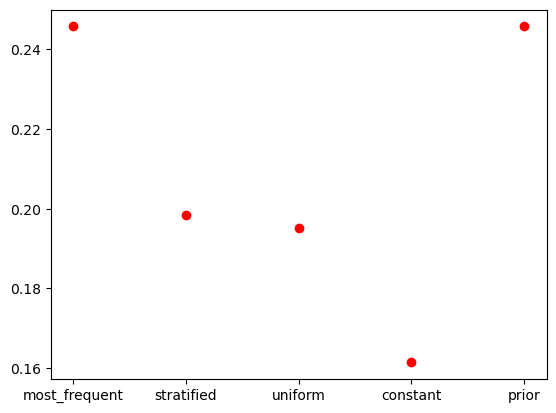

emovo


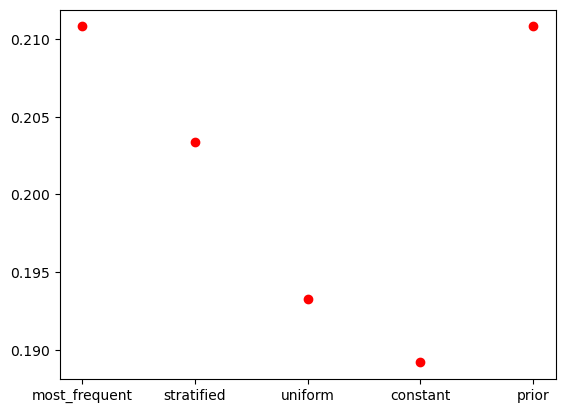

ravdess


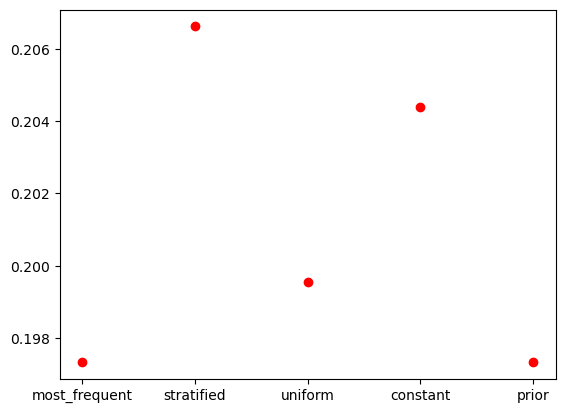

In [18]:
for d in ds:
    print(d)
    plot_scores(scores[d])

In [19]:
best_strategies = []
for d in ds:
    max_value = max(scores[d])
    max_index = scores[d].index(max_value)
    best_strategies.append(strategies[max_index])
    print(f'For {d} best strategy is {strategies[max_index]} with score {max_value}')

For emodb best strategy is most_frequent with score 0.2457831325301205
For emovo best strategy is most_frequent with score 0.21081081081081082
For ravdess best strategy is stratified with score 0.20662695457930008


In [20]:
best_strategies

['most_frequent', 'most_frequent', 'stratified']

emodb with most_frequent
emovo with most_frequent
ravdess with stratified


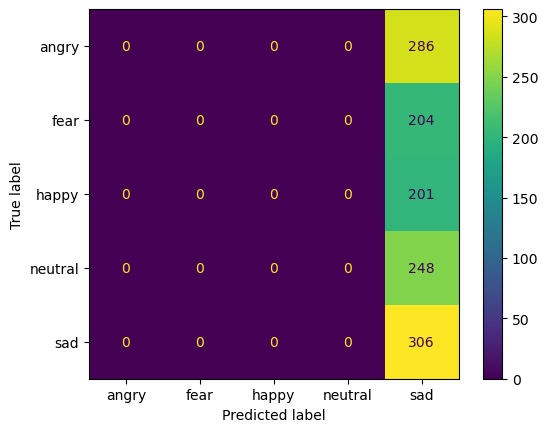

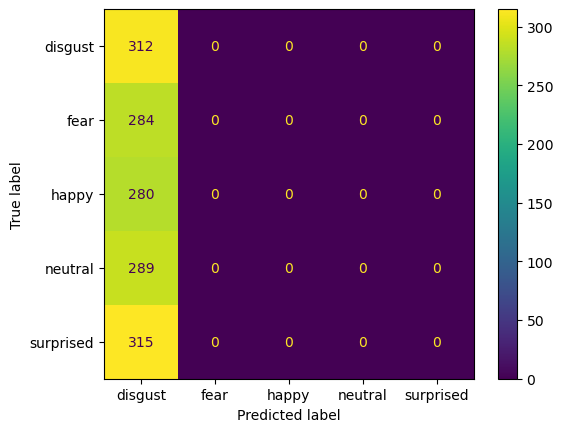

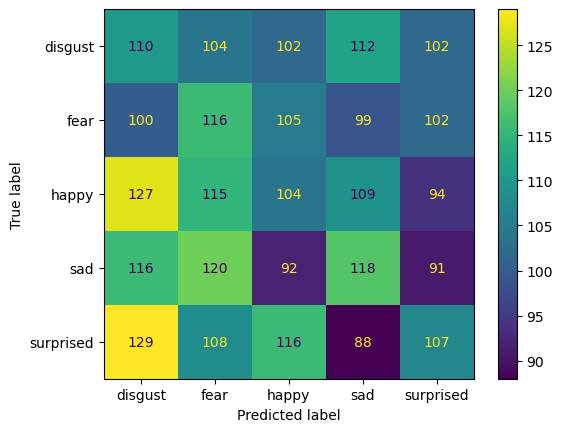

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for st, d in zip(best_strategies, mtd_ls):
    print(f'{d} with {st}')
    ds = mtd_ls[d]
    y = ds['label']
    X = ds.drop('label', axis = 1)
    X = X.drop('actor', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    
    if st =='constant':
        dclf = DummyClassifier(strategy = st, random_state = random_state, constant ='angry')
    else:
        dclf = DummyClassifier(strategy = st, random_state = random_state)
        
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=dclf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dclf.classes_)
    disp.plot()